In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [41]:
df = pd.read_csv("The_Cancer_data_1500_V2.csv")
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,50.320000,17.640968,20.000000,35.000000,51.000000,66.000000,80.000000
Gender,1500.0,0.490667,0.500080,0.000000,0.000000,0.000000,1.000000,1.000000
BMI,1500.0,27.513321,7.230012,15.000291,21.483134,27.598494,33.850837,39.958688
Smoking,1500.0,0.269333,0.443761,0.000000,0.000000,0.000000,1.000000,1.000000
GeneticRisk,1500.0,0.508667,0.678895,0.000000,0.000000,0.000000,1.000000,2.000000
PhysicalActivity,1500.0,4.897929,2.866162,0.002410,2.434609,4.834316,7.409896,9.994607
AlcoholIntake,1500.0,2.417987,1.419318,0.001215,1.210598,2.382971,3.585624,4.987115
CancerHistory,1500.0,0.144000,0.351207,0.000000,0.000000,0.000000,0.000000,1.000000
Diagnosis,1500.0,0.371333,0.483322,0.000000,0.000000,0.000000,1.000000,1.000000


In [13]:
df.head()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1


In [14]:
df.shape

(1500, 9)

## Feature categorization

In [15]:
binary_features = ['Gender','Smoking','CancerHistory','Diagnosis']
continous_features = ['Age','BMI','PhysicalActivity','AlcoholIntake']
categorical_features = ['GeneticRisk']

## EDA 

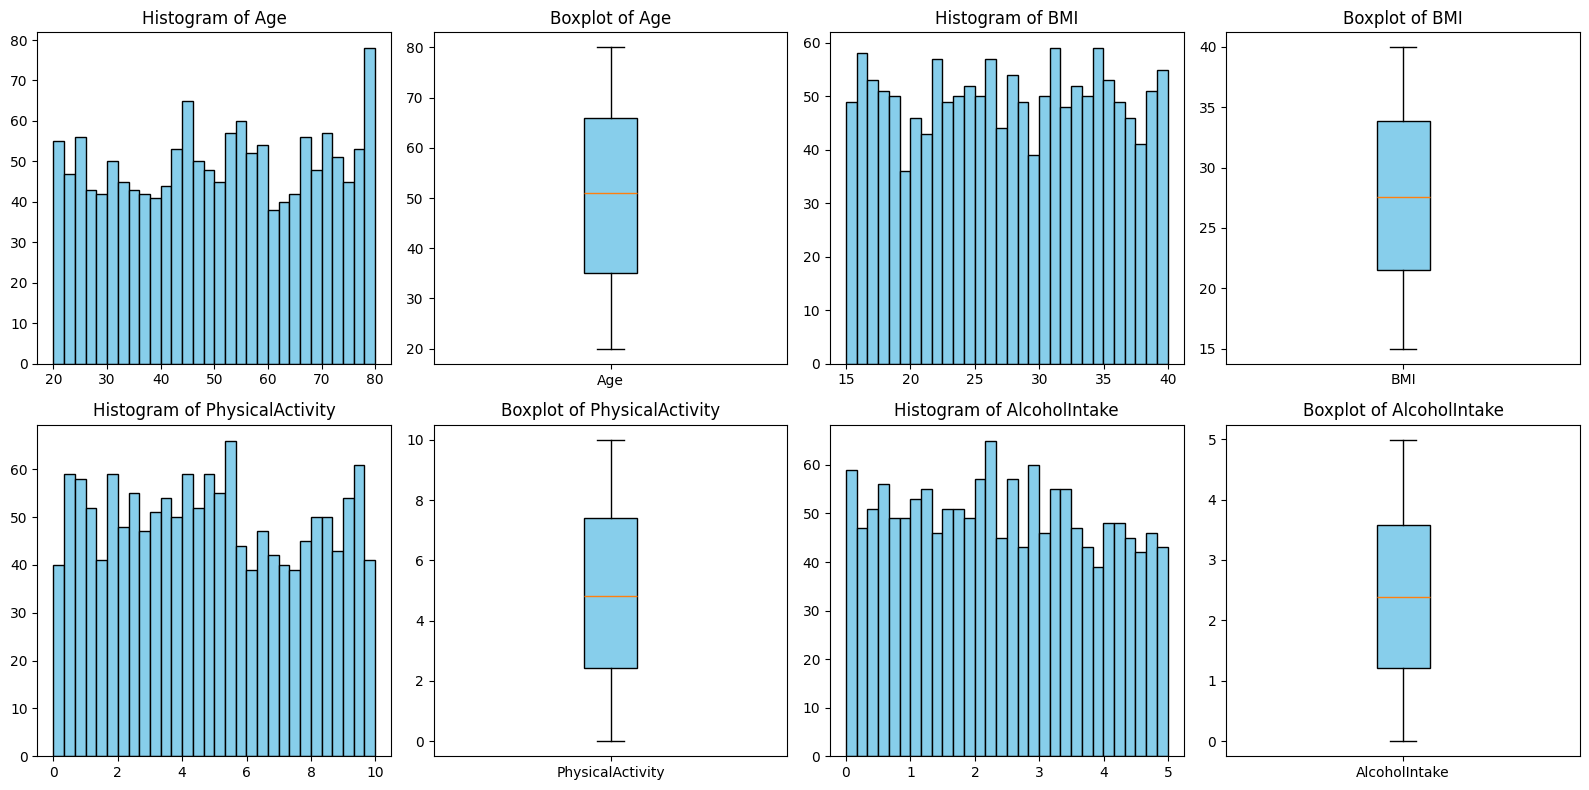

In [17]:
#histogram and boxplots for continous features

fig, axes = plt.subplots(2,4, figsize=(16,8))
for i, feature in enumerate(continous_features):
    # Histogram
    ax_hist = axes[i // 2, (i % 2) * 2]
    ax_hist.hist(df[feature].dropna(), bins=30, color='skyblue', edgecolor='black')
    ax_hist.set_title(f'Histogram of {feature}')
    
    # Boxplot
    ax_box = axes[i // 2, (i % 2) * 2 + 1]
    ax_box.boxplot(df[feature].dropna(), vert=True, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    ax_box.set_title(f'Boxplot of {feature}')
    ax_box.set_xticks([1])
    ax_box.set_xticklabels([feature])

plt.tight_layout()
plt.show()

In [23]:
import warnings
warnings.filterwarnings("ignore")

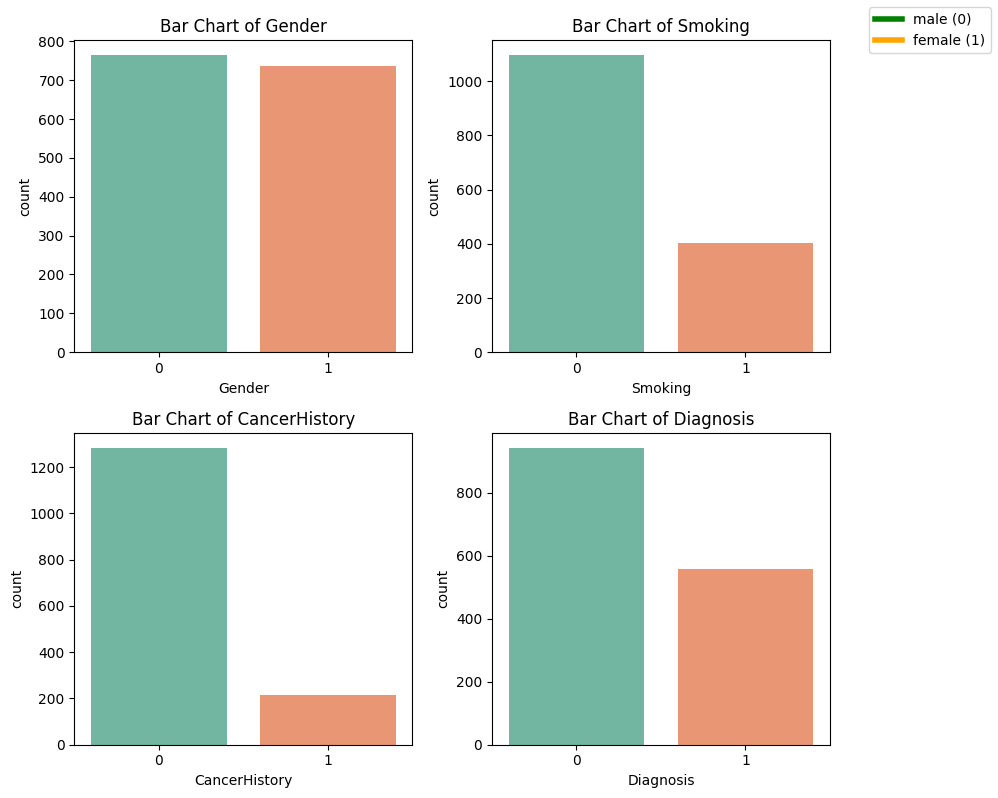

In [30]:
#Bar Charts for binary functions
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for i, feature in enumerate(binary_features):
    sns.countplot(data=df, x=feature, ax=axes[i // 2, i % 2], palette='Set2')
    axes[i // 2, i % 2].set_title(f'Bar Chart of {feature}')
    
# Add a legend with the updated colors
handles = [plt.Line2D([0], [0], color='green', lw=4, label='male (0)'),
           plt.Line2D([0], [0], color='orange', lw=4, label='female (1)')]
fig.legend(handles=handles, loc='upper right')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust layout to make room for legend
plt.show()



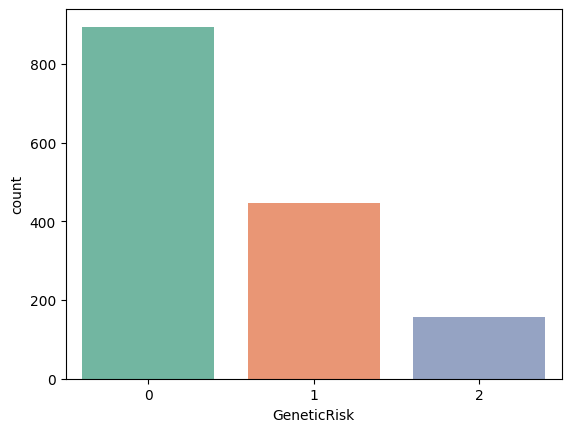

In [27]:
#Bar Chart for Categorical Features

## Correlation Heatmap with Diagnosis

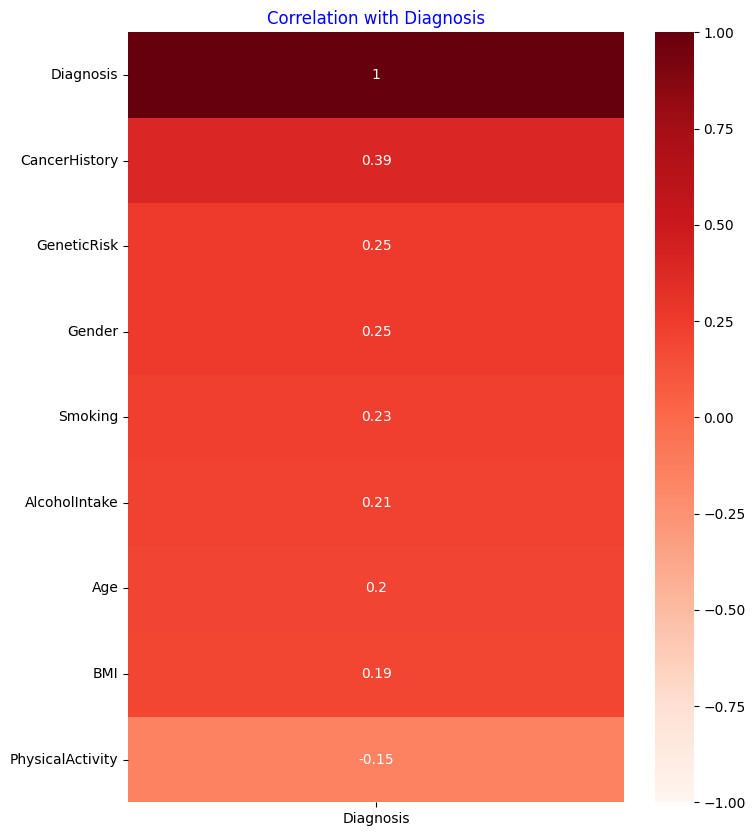

In [33]:
plt.figure(figsize=(8, 10))
sns.heatmap(df.corr()[['Diagnosis']].sort_values(by='Diagnosis', ascending=False), annot=True, cmap='Reds', vmin=-1, vmax=1)
plt.title('Correlation with Diagnosis', color='blue', fontsize=12)
plt.show()

## Box plot for continous features by diagnosis

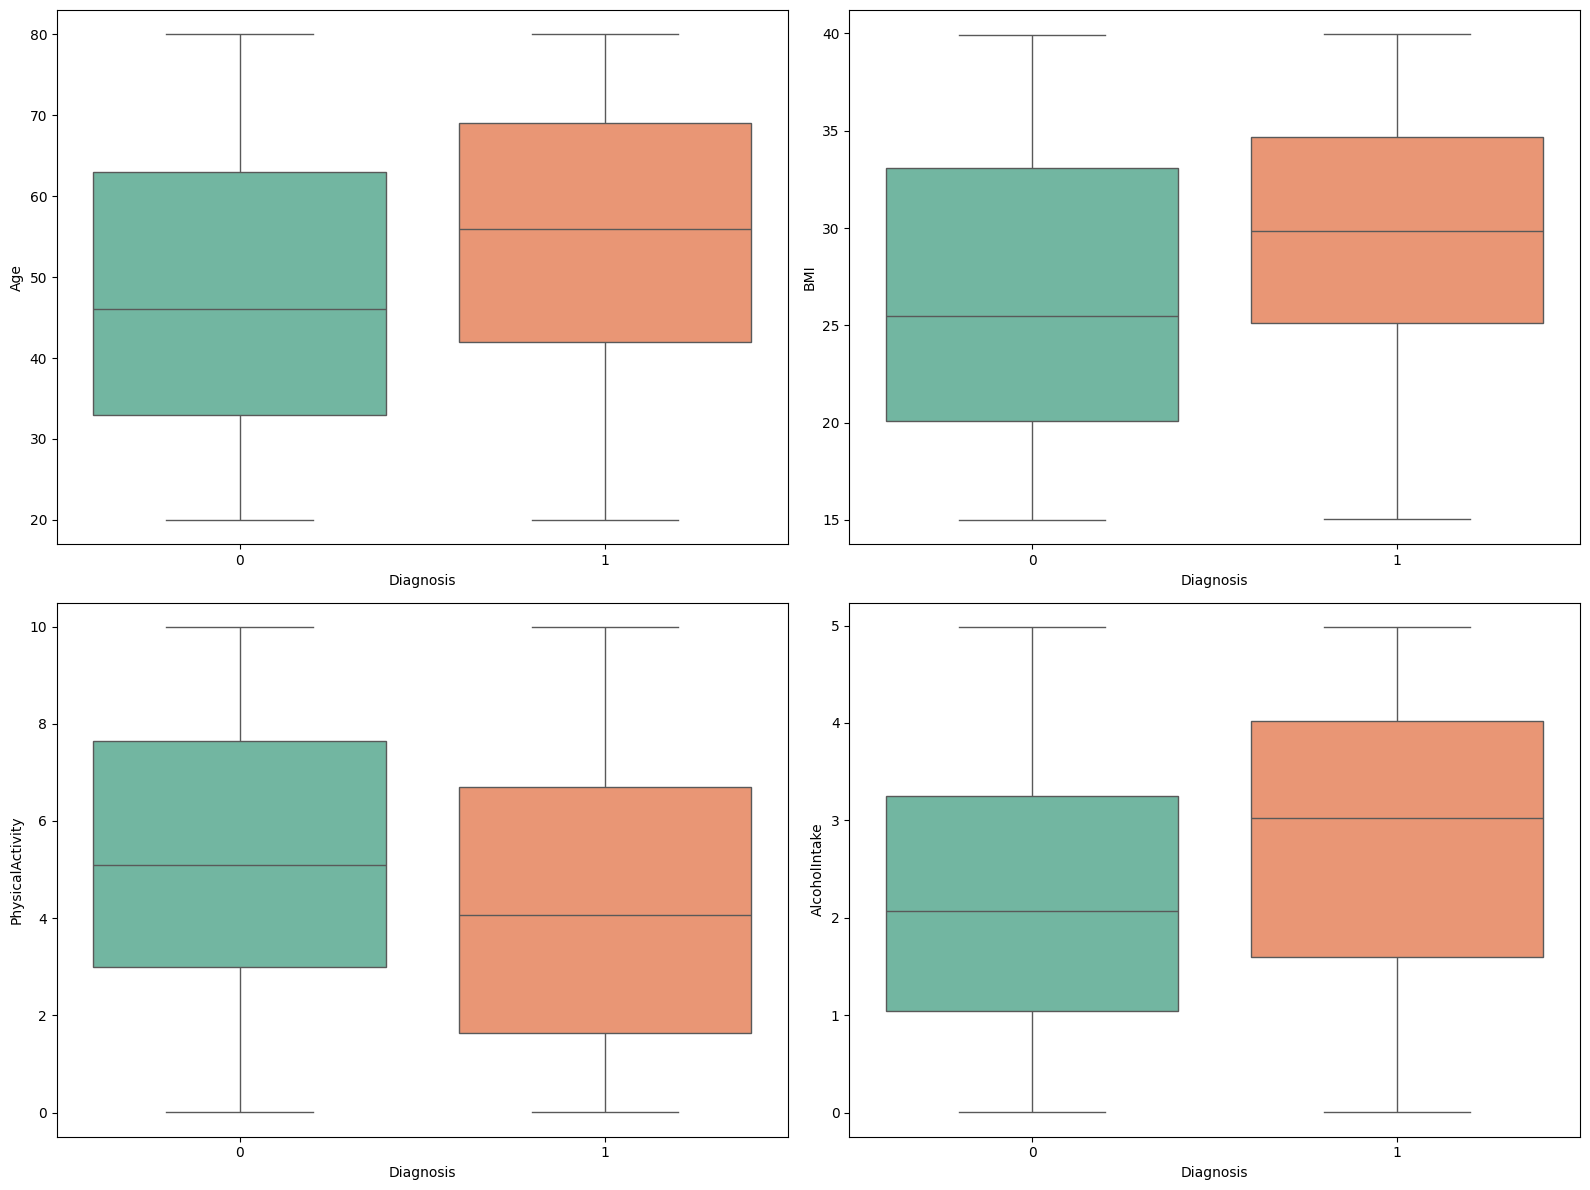

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
for i, feature in enumerate(continous_features):
    sns.boxplot(data=df, x='Diagnosis', y=feature, ax=axes[i // 2, i % 2], palette='Set2')
plt.tight_layout()
plt.show()


In [38]:
num_smokers = df['Smoking'].sum()

print(f'Number of smokers: {num_smokers}')

Number of smokers: 404


In [42]:
gender_qty = df['Gender'].sum()
print(f'Number of females: {gender_qty}')
print(f'Number of males: {1500-gender_qty}')

Number of females: 736
Number of males: 764


In [44]:
cancer_family = df['CancerHistory'].sum()

print(f'Number of people with family history: {cancer_family}')

Number of people with family history: 216


In [45]:
diagnosed = df['Diagnosis'].sum()

print(f'Number of diagnosed: {diagnosed}')

Number of diagnosed: 557


# Summary Statistics:

#### **Age**: Ranges from 20 to 80 years, with a mean of 50.32 years.
#### **Gender**: Almost equally distributed (0: Male, 1: Female).
#### **BMI**: Ranges from 15.00 to 39.96, with a mean of 27.51.
#### **Smoking**: 26.93% are smokers.
#### **GeneticRisk**: Categorical values ranging from 0 to 2.
#### **PhysicalActivity**: Ranges from 0.002 to 9.99 hours per week, with a mean of 4.90 hours.
#### **AlcoholIntake**: Ranges from 0.001 to 4.99 units per week, with a mean of 2.42 units.
#### **CancerHistory**: 14.4% have a family history of cancer.
#### **Diagnosis**: 37.13% have been diagnosed with cancer.

### Binary Features (Bar Charts)
- **Gender**:
  - The distribution of gender is nearly equal, with slightly more males than females.
  - Males: 764 (50.85%)
  - Females: 736 (49.60%)
  
- **Smoking**:
  - A majority of the individuals in the dataset are non-smokers.
  - Non-Smokers: 1096 (73.06%)
  - Smokers: 404 (26.93%)
  
- **CancerHistory**:
  - Most individuals do not have a family history of cancer.
  - No Family History of Cancer: 1284 (85.00%)
  - Family History of Cancer: 216 (15.00%)
  
- **Diagnosis**:
  - More individuals have not been diagnosed with cancer compared to those who have.
  - Not Diagnosed with Cancer: 943 (63.00%)
  - Diagnosed with Cancer: 557 (37.00%)

### Continuous Features (Histograms with KDE)
- **Age**:
  - The distribution of age is relatively uniform across different age groups, with a slight increase in frequency around ages 65 and 80. There is a noticeable dip between the ages of 60 and 65.
  - Mean: ~50 years
  
- **BMI**:
  - The BMI distribution shows a uniform spread with no distinct peaks, suggesting varied body mass indices across the population.
  - Mean: ~27.5
  
- **Physical Activity**:
  - The distribution of physical activity hours per week is fairly even, indicating a wide range of physical activity levels among individuals.
  - Mean: ~5 hours per week
  
- **Alcohol Intake**:
  - The alcohol intake distribution is also relatively uniform, with a slight increase in individuals consuming around 2 units per week.
  - Mean: ~2.5 units per week

### Categorical Feature (Pie Chart)
- **Genetic Risk**:
  - The majority of the population falls under 'Low' genetic risk, with 'Medium' and 'High' risk categories being less frequent.
  - Low Risk: 895 (59.7%)
  - Medium Risk: 447 (29.8%)
  - High Risk: 158 (10.5%)

### Conclusions:
- The dataset seems to have a balanced gender distribution.
- There is a higher prevalence of non-smokers (71.67%) and individuals without a family history of cancer (85.00%).
- Cancer diagnoses are less common (37.00%) compared to non-diagnoses (63.00%).
- The continuous features show a fairly uniform distribution, indicating diverse characteristics within the population.
- Most individuals have a low genetic risk for cancer (59.7%), with fewer individuals in the medium (29.8%) and high (10.5%) risk categories.

The data is very evenly balances throughout the set, with exceptions in some of the binary and categorical features. The continous features don't contain any outliers, meaning the data is pretty cleand and doesn't need much preprocessing.

The model will be built trying to minimize false negatives as much as possible, making recall a priority metric.



## Data Pre-processing

In [54]:
# Define the target and features
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Standardize the continuous features
scaler = StandardScaler()
X[continous_features] = scaler.fit_transform(X[continous_features])


In [55]:
x

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory
0,58,1,16.085313,0,1,8.146251,4.148219,1
1,71,0,30.828784,0,1,9.361630,3.519683,0
2,48,1,38.785084,0,2,5.135179,4.728368,0
3,34,0,30.040296,0,0,9.502792,2.044636,0
4,62,1,35.479721,0,0,5.356890,3.309849,0
...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0
1496,31,0,33.447125,0,1,1.668297,2.280636,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0
1498,55,0,25.568216,0,0,7.795317,1.986138,1


In [56]:
y

0       1
1       0
2       1
3       0
4       1
       ..
1495    1
1496    1
1497    1
1498    1
1499    0
Name: Diagnosis, Length: 1500, dtype: int64

## Picking Model

In [57]:
# Define models for evaluation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'k-NN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}
# Evaluate each model using Stratified k-Fold Cross-Validation
results = {}
k = 5
skf = StratifiedKFold(n_splits=k)

for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    results[model_name] = {
        'Accuracy': scores.mean()
    }

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
print(results_df)


                     Accuracy
Logistic Regression  0.849333
Decision Tree        0.865333
Random Forest        0.923333
Gradient Boosting    0.924667
SVM                  0.880000
k-NN                 0.834000
Naive Bayes          0.826000


## Hyperparameter tuning 

In [58]:
from skopt import BayesSearchCV

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

param_space = {
    'n_estimators': (170, 180),
    'learning_rate': (0.085, 0.095),
    'max_depth': [2],
    'min_samples_split': [5],
    'min_samples_leaf': [5]
}

bayes_search = BayesSearchCV(
    estimator=GradientBoostingClassifier(),
    search_spaces=param_space,
    n_iter=20,
    cv=5,
    scoring='recall',
    n_jobs=-1,
    random_state=42
)

bayes_search.fit(X_train, y_train)
best_params = bayes_search.best_params_
best_model = GradientBoostingClassifier(**best_params)
best_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.08503630307254743, max_depth=2,
                           min_samples_leaf=5, min_samples_split=5,
                           n_estimators=176)

## Histogram of false negatives for different thresholds to find the optimal conditions 

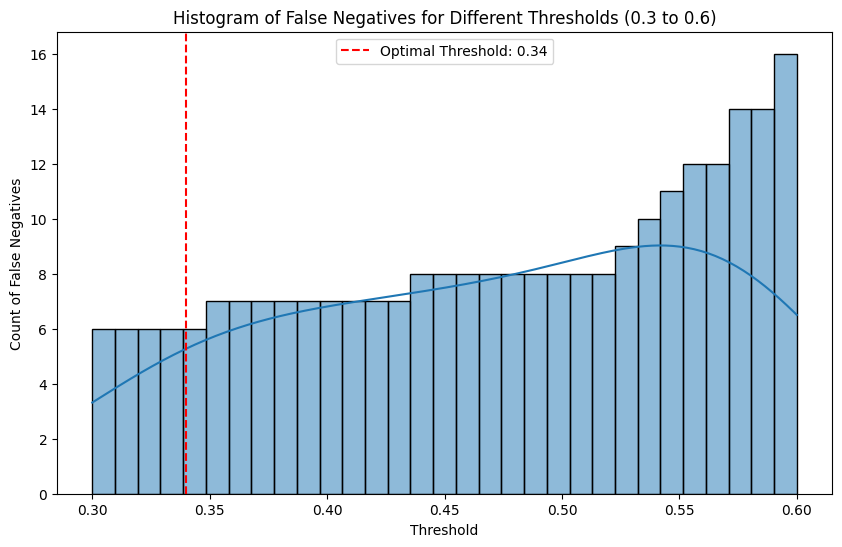

In [60]:
# Evaluate on test set with a predefined threshold
y_prob = best_model.predict_proba(X_test)[:, 1]
thresholds = np.arange(0.3, 0.61, 0.01)
metrics = {'Threshold': [], 'False Negatives': []}

for threshold in thresholds:
    y_pred = (y_prob >= threshold).astype(int)
    fn = confusion_matrix(y_test, y_pred).ravel()[2]  # Get FN count
    metrics['Threshold'].append(threshold)
    metrics['False Negatives'].append(fn)

metrics_df = pd.DataFrame(metrics)

plt.figure(figsize=(10, 6))
sns.histplot(metrics_df, x='Threshold', weights='False Negatives', bins=len(thresholds), kde=True)
plt.xlabel('Threshold')
plt.ylabel('Count of False Negatives')
plt.title('Histogram of False Negatives for Different Thresholds (0.3 to 0.6)')
plt.axvline(0.34, color='r', linestyle='--', label='Optimal Threshold: 0.34')
plt.legend()
plt.show()

# Final Model Evaluation with Predefined Threshold

manually input the threshold that I considered had the best results.

In [62]:
optimal_threshold = 0.34
y_pred_final = (y_prob >= optimal_threshold).astype(int)

# Final evaluation
final_test_accuracy = accuracy_score(y_test, y_pred_final)
final_test_precision = precision_score(y_test, y_pred_final)
final_test_recall = recall_score(y_test, y_pred_final)
final_test_f1 = f1_score(y_test, y_pred_final)
conf_matrix = confusion_matrix(y_test, y_pred_final)

print(f"Final Test Accuracy: {final_test_accuracy}")
print(f"Final Test Precision: {final_test_precision}")
print(f"Final Test Recall: {final_test_recall}")
print(f"Final Test F1 Score: {final_test_f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Final Test Accuracy: 0.94
Final Test Precision: 0.8974358974358975
Final Test Recall: 0.9459459459459459
Final Test F1 Score: 0.9210526315789473
Confusion Matrix:
[[177  12]
 [  6 105]]


# Interpretation of Metrics:

1. **Accuracy**:
 - **0.94** indicates that 94% of the predictions made by the model are correct. This means that out of 100 predictions, 94 are expected to be accurate.

2. **Precision**:
 - **0.897** indicates that when the model predicts a positive diagnosis (cancer diagnosis), it is correct 89.7% of the time. Precision is crucial when the cost of false positives is high.

3. **Recall**:
 - **0.946** indicates that the model correctly identifies 94.6% of actual positive cases (cancer diagnoses). High recall is important in this context because it means fewer false negatives, which is critical in medical diagnoses to ensure that most of the true cases are identified.

4. **F1 Score**:
 - **0.921** is the harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when you need to take both metrics into account.

5. **Confusion Matrix**:
 - **True Positives (TP)**: 105
   - These are the cases where the model correctly predicted cancer diagnosis (i.e., the model predicted positive, and it was actually positive).
 - **True Negatives (TN)**: 177
   - These are the cases where the model correctly predicted no cancer diagnosis (i.e., the model predicted negative, and it was actually negative).
 - **False Positives (FP)**: 12
   - These are the cases where the model incorrectly predicted cancer diagnosis (i.e., the model predicted positive, but it was actually negative). False positives could lead to unnecessary stress and additional tests for patients.
 - **False Negatives (FN)**: 6
   - These are the cases where the model incorrectly predicted no cancer diagnosis (i.e., the model predicted negative, but it was actually positive). False negatives are critical as they mean missed diagnoses, which could delay treatment for the patient.

### Practical Implications:

- **High Accuracy and Recall**:
- The model’s high accuracy and recall suggest it is very effective in identifying individuals with cancer. This means that in a practical scenario, the model will correctly identify most patients who actually have cancer, which is vital for early detection and treatment.

- **Moderate Precision**:
- While precision is also quite high, there are still some false positives. This indicates that some patients might be incorrectly diagnosed with cancer, leading to unnecessary follow-up tests and anxiety. However, in medical screening, it is often more acceptable to have a higher number of false positives than false negatives.

- **Balanced F1 Score**:
- The F1 score indicates a good balance between precision and recall. This balance ensures that the model is not only good at identifying true positives but also does not make too many false positive predictions.

### Conclusion:

The model is highly effective for cancer diagnosis with a high accuracy and recall rate, meaning it successfully identifies the majority of true cancer cases. The slightly lower precision indicates that there will be some false positives, but this is often acceptable in medical contexts where the priority is to minimize missed diagnoses (false negatives). The high F1 score confirms that the model maintains a good balance between precision and recall, making it reliable for practical use in medical diagnostics.
